Data Collection Process 
The Chicago Crimes dataset for the period 2020 to 2024 was collected using Python and 
the official city API. 
The script retrieves data year by year and orders the records in descending order by date. 
The data is saved directly to a CSV file with specific columns, including: crime ID, date, 
primary type, description, location, arrest, domestic, district, latitude, and longitude. 
Large requests were handled by splitting the download into batches of 50,000 records per 
request, with a small delay between requests to avoid server rejection. 
Network errors were also handled, and the progress of saved records was displayed 
continuously. 
After completing all years, the full dataset was saved in the file 
chicago_crimes_full_2020_2024.csv.

In [54]:
import requests
import time
import csv
import sys

# CONFIG
BASE_URL = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"
FILENAME = "chicago_crimes_full_2020_2024.csv"
YEARS = [2020, 2021, 2022, 2023, 2024]
PER_PAGE = 50000  

def fetch_all_data():
    print(f"Starting MASSIVE download for years: {', '.join(map(str, YEARS))}")
    print(f"Data will be streamed to {FILENAME}...")

    # CSV COLUMNS
    headers = [
        "id", "date", "year", "primary_type", "description", 
        "location_description", "arrest", "domestic", "district", 
        "latitude", "longitude"
    ]

    total_saved = 0

    with open(FILENAME, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()

        for year in YEARS:
            print(f"\n=== PROCESSING YEAR {year} ===")
            offset = 0
            finished_year = False



Data Cleaning Steps Summary: 
· Initial Data Assessment: The raw dataset contained several columns with a significant 
number of missing (null) values, particularly in the arrest, domestic, location_description, 
latitude, and longitude fields.
. First i removed the duplicates. 
· Then the Priority Handling of Geographic Data: Rows containing null values in the latitude and 
longitude columns were removed. This was the primary and most critical cleaning step, as 
valid coordinates are essential for spatial analysis. This action reduced the total number of 
rows in the dataset. 
· Handling Remaining Null Values: After securing the geographic data, null values in other 
columns were addressed through imputation (filling): 
· Nulls in the arrest and domestic columns were filled with the value False. 
· Nulls in the location_description column were filled with the placeholder string 
'unavailable'. 
· Data Type Conversion & Standardization: The data types of specific columns were 
corrected to better reflect their content: 
· The date column was converted from an object (string) type to a proper datetime format. 
· The arrest and domestic columns, now containing only boolean values (True from 
original data and False from imputation), were converted to the boolean data type. 


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("chicago_crimes_full_2020_2024.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184260 entries, 0 to 1184259
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1184260 non-null  int64  
 1   date                  1184260 non-null  object 
 2   year                  1184260 non-null  int64  
 3   primary_type          1184260 non-null  object 
 4   description           1184260 non-null  object 
 5   location_description  1177570 non-null  object 
 6   arrest                156951 non-null   object 
 7   domestic              233826 non-null   object 
 8   district              1184260 non-null  int64  
 9   latitude              1164531 non-null  float64
 10  longitude             1164531 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 99.4+ MB


In [58]:
for col in df.columns:
    print(f"Column {col}:")
    print(f"Number of unique values: {len(df[col].value_counts())}")
    print(f"Number of null values: {df[col].isnull().sum()}")
    print("------------------------------")

Column id:
Number of unique values: 1184244
Number of null values: 0
------------------------------
Column date:
Number of unique values: 580481
Number of null values: 0
------------------------------
Column year:
Number of unique values: 5
Number of null values: 0
------------------------------
Column primary_type:
Number of unique values: 33
Number of null values: 0
------------------------------
Column description:
Number of unique values: 474
Number of null values: 0
------------------------------
Column location_description:
Number of unique values: 182
Number of null values: 6690
------------------------------
Column arrest:
Number of unique values: 1
Number of null values: 1027309
------------------------------
Column domestic:
Number of unique values: 1
Number of null values: 950434
------------------------------
Column district:
Number of unique values: 23
Number of null values: 0
------------------------------
Column latitude:
Number of unique values: 320644
Number of null va

In [59]:
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 16


In [60]:
df = df.drop_duplicates()

In [61]:
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


In [62]:

df = df.dropna(subset=['latitude', 'longitude'])

In [63]:
columns_to_check = ['latitude', 'longitude']

for col in columns_to_check:
    print(f"Column {col}:")
    print(f"Number of unique values: {len(df[col].value_counts())}")
    print(f"Number of null values: {df[col].isnull().sum()}")
    print("------------------------------")

Column latitude:
Number of unique values: 320644
Number of null values: 0
------------------------------
Column longitude:
Number of unique values: 320539
Number of null values: 0
------------------------------


In [64]:

cols = ['arrest', 'domestic']

for col in cols:
    df[col] = df[col].fillna(False).astype('boolean')
        

In [65]:

col = 'location_description'
df[col] = df[col].fillna('unavailable')


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164515 entries, 0 to 1184259
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1164515 non-null  int64  
 1   date                  1164515 non-null  object 
 2   year                  1164515 non-null  int64  
 3   primary_type          1164515 non-null  object 
 4   description           1164515 non-null  object 
 5   location_description  1164515 non-null  object 
 6   arrest                1164515 non-null  boolean
 7   domestic              1164515 non-null  boolean
 8   district              1164515 non-null  int64  
 9   latitude              1164515 non-null  float64
 10  longitude             1164515 non-null  float64
dtypes: boolean(2), float64(2), int64(3), object(4)
memory usage: 93.3+ MB


In [67]:
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by='date', ascending=True)

df = df.reset_index(drop=True)


In [68]:
df.head()

,id,date,year,primary_type,description,location_description,arrest,domestic,district,latitude,longitude
0,11968575,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,2,41.837964,-87.617471
1,12258770,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COLLEGE / UNIVERSITY - GROUNDS,False,False,19,41.965381,-87.659111
2,12255046,2020-01-01,2020,OTHER OFFENSE,TELEPHONE THREAT,OTHER (SPECIFY),False,True,10,41.854926,-87.707781
3,13549608,2020-01-01,2020,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,15,41.898643,-87.749604
4,12073603,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,4,41.731020,-87.565838


In [69]:
print(df[['latitude', 'longitude']].describe())

           latitude     longitude
count  1.164515e+06  1.164515e+06
mean   4.184474e+01 -8.766929e+01
std    8.774032e-02  5.981934e-02
min    3.661945e+01 -9.168657e+01
25%    4.176883e+01 -8.771123e+01
50%    4.186164e+01 -8.766269e+01
75%    4.190871e+01 -8.762698e+01
max    4.202259e+01 -8.752453e+01


In [70]:
df = df[
    (df['latitude'] >= 41.6445) &
    (df['latitude'] <= 42.0230) &
    (df['longitude'] >= -87.9401) &
    (df['longitude'] <= -87.5237)
]


In [71]:
print(df[['latitude', 'longitude']].describe())

           latitude     longitude
count  1.164513e+06  1.164513e+06
mean   4.184475e+01 -8.766929e+01
std    8.747276e-02  5.958727e-02
min    4.164459e+01 -8.793973e+01
25%    4.176883e+01 -8.771123e+01
50%    4.186164e+01 -8.766269e+01
75%    4.190871e+01 -8.762698e+01
max    4.202259e+01 -8.752453e+01


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164513 entries, 0 to 1164514
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1164513 non-null  int64         
 1   date                  1164513 non-null  datetime64[ns]
 2   year                  1164513 non-null  int64         
 3   primary_type          1164513 non-null  object        
 4   description           1164513 non-null  object        
 5   location_description  1164513 non-null  object        
 6   arrest                1164513 non-null  boolean       
 7   domestic              1164513 non-null  boolean       
 8   district              1164513 non-null  int64         
 9   latitude              1164513 non-null  float64       
 10  longitude             1164513 non-null  float64       
dtypes: boolean(2), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 93.3+ MB


In [73]:
df['arrest'].value_counts()

arrest
False    1010700
True      153813
Name: count, dtype: Int64

In [74]:
output_filename = "chicago_crimes_cleaned.csv"

df.to_csv(output_filename, index=False)
print(f"Saved: {output_filename}")

import os
print('Full path:', os.path.abspath(output_filename))

Saved: chicago_crimes_cleaned.csv
Full path: c:\Users\tarek\Downloads\chicago_crimes_cleaned.csv


In [75]:
df.head(10)

,id,date,year,primary_type,description,location_description,arrest,domestic,district,latitude,longitude
0,11968575,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,2,41.837964,-87.617471
1,12258770,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COLLEGE / UNIVERSITY - GROUNDS,False,False,19,41.965381,-87.659111
2,12255046,2020-01-01,2020,OTHER OFFENSE,TELEPHONE THREAT,OTHER (SPECIFY),False,True,10,41.854926,-87.707781
3,13549608,2020-01-01,2020,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,15,41.898643,-87.749604
4,12073603,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,4,41.731020,-87.565838
5,12181533,2020-01-01,2020,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,2,41.814133,-87.599358
6,11938995,2020-01-01,2020,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,False,18,41.897623,-87.621337
7,12007411,2020-01-01,2020,CRIMINAL SEXUAL ASSAULT,ATTEMPT NON-AGGRAVATED,APARTMENT,False,True,3,41.779120,-87.615599
8,11938144,2020-01-01,2020,ASSAULT,AGGRAVATED PO: HANDGUN,VACANT LOT/LAND,False,False,10,41.863700,-87.737326
9,12060971,2020-01-01,2020,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,11,41.868007,-87.723929


In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium

numeric_cols = df.select_dtypes(include=np.number).columns
print(df[numeric_cols].describe())

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(df[col].value_counts())


                 id          year      district      latitude     longitude
count  1.164513e+06  1.164513e+06  1.164513e+06  1.164513e+06  1.164513e+06
mean   1.279930e+07  2.022135e+03  1.129362e+01  4.184475e+01 -8.766929e+01
std    8.715977e+05  1.406864e+00  7.050433e+00  8.747276e-02  5.958727e-02
min    2.488900e+04  2.020000e+03  1.000000e+00  4.164459e+01 -8.793973e+01
25%    1.239067e+07  2.021000e+03  5.000000e+00  4.176883e+01 -8.771123e+01
50%    1.284582e+07  2.022000e+03  1.000000e+01  4.186164e+01 -8.766269e+01
75%    1.327876e+07  2.023000e+03  1.700000e+01  4.190871e+01 -8.762698e+01
max    1.404193e+07  2.024000e+03  3.100000e+01  4.202259e+01 -8.752453e+01
primary_type
THEFT                                250546
BATTERY                              212476
CRIMINAL DAMAGE                      134994
ASSAULT                              105092
MOTOR VEHICLE THEFT                   92566
DECEPTIVE PRACTICE                    80667
OTHER OFFENSE                         7

In [77]:
# Some districts  have the highest number of crimes, indicating they are more prone to criminal activity and may require stronger security measures.
# Some districts have a higher arrest rate compared to total crimes, indicating better police effectiveness in those areas.
# Some districts show a high number of crimes but a low arrest rate, which may indicate potential investigation issues or lack of security resources.
# Comparing total crimes vs total arrests can help identify areas needing improved police strategies or better resource allocation.

district_stats = df.groupby('district').agg(
    total_crimes=('arrest', 'count'),      
    total_arrests=('arrest', 'sum')     
).reset_index()

district_stats['arrest_rate'] = (district_stats['total_arrests'] / district_stats['total_crimes']) * 100

district_stats.head(10)

,district,total_crimes,total_arrests,arrest_rate
0,1,58781,9600,16.331808
1,2,56871,5140,9.037998
2,3,59302,6542,11.031668
3,4,66702,6982,10.467452
4,5,49933,7092,14.203032
5,6,72344,9767,13.500774
6,7,53742,8635,16.067508
7,8,74243,8086,10.891262
8,9,51207,6813,13.304822
9,10,50244,9420,18.748507


In [78]:
df['date'] = pd.to_datetime(df['date'])

df['day_of_week'] = df['date'].dt.day_name()  
df['month'] = df['date'].dt.month_name() 

df['hour'] = df['date'].dt.hour


In [79]:
df.head()


,id,date,year,primary_type,description,location_description,arrest,domestic,district,latitude,longitude,day_of_week,month,hour
0,11968575,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,2,41.837964,-87.617471,Wednesday,January,0
1,12258770,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COLLEGE / UNIVERSITY - GROUNDS,False,False,19,41.965381,-87.659111,Wednesday,January,0
2,12255046,2020-01-01,2020,OTHER OFFENSE,TELEPHONE THREAT,OTHER (SPECIFY),False,True,10,41.854926,-87.707781,Wednesday,January,0
3,13549608,2020-01-01,2020,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,15,41.898643,-87.749604,Wednesday,January,0
4,12073603,2020-01-01,2020,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,4,41.731020,-87.565838,Wednesday,January,0


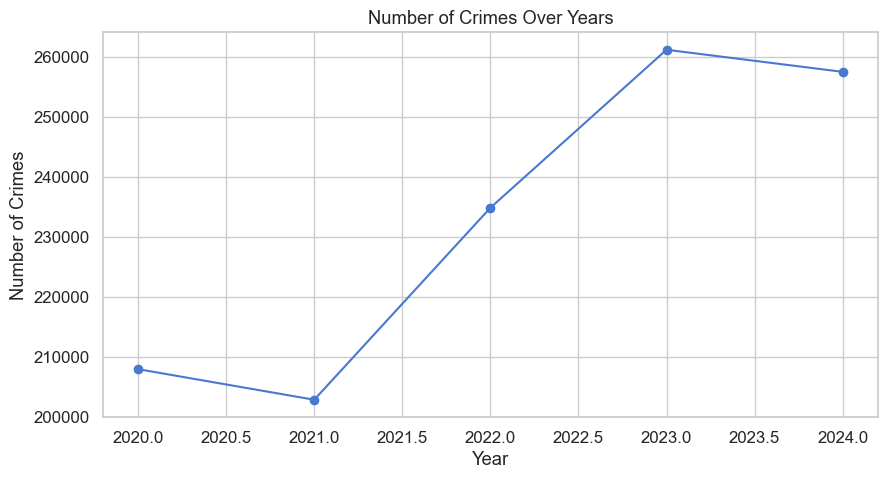

In [80]:


sns.set(style='whitegrid', palette='muted', font_scale=1.1)
crime_by_year = df.groupby('year').size()
plt.figure(figsize=(10,5))
crime_by_year.plot(kind='line', marker='o')
plt.title('Number of Crimes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()
# The trend of crimes over years helps identify periods of high or low criminal activity
# Peaks in crime numbers can indicate specific events or social issues affecting crime rates


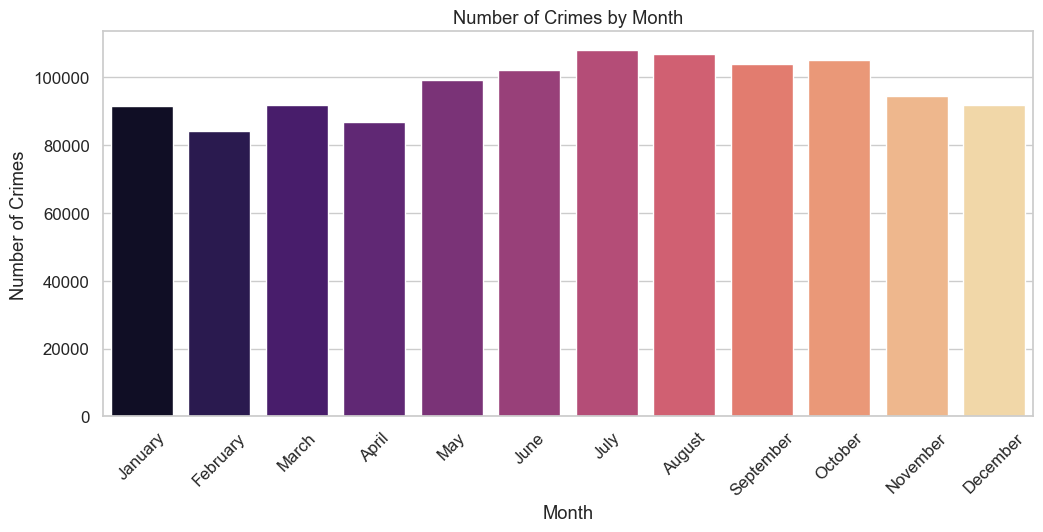

In [81]:
plt.figure(figsize=(12,5))
sns.countplot(x='month', data=df, order=['January','February','March','April','May','June','July','August','September','October','November','December'], palette='magma')
plt.title('Number of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()
# The highest number of crimes occurs in summer months: June, July, August → outdoor activities and events may increase crime rate
# Some months like January and February have lower activity → opportunity to allocate resources differently
# Knowing crime peaks by month helps police plan seasonal patrols more effectively
# This information can be used to organize awareness campaigns and preventive initiatives during high-risk months


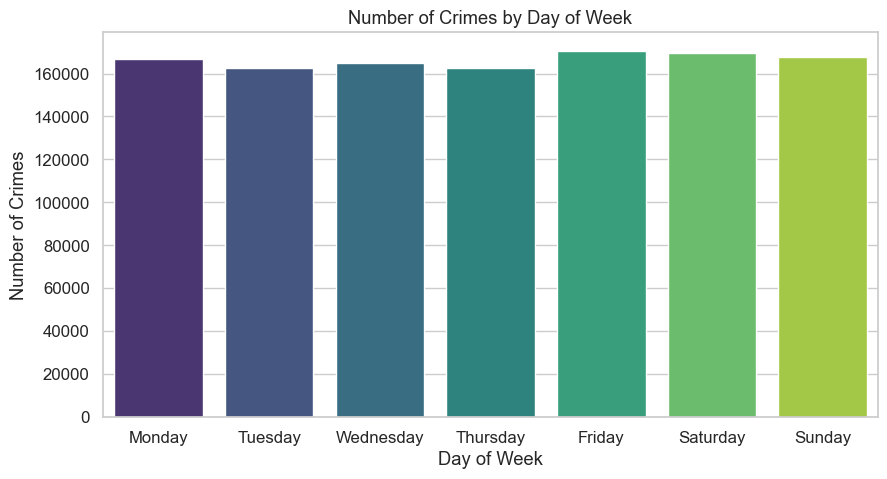

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')
plt.title('Number of Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()


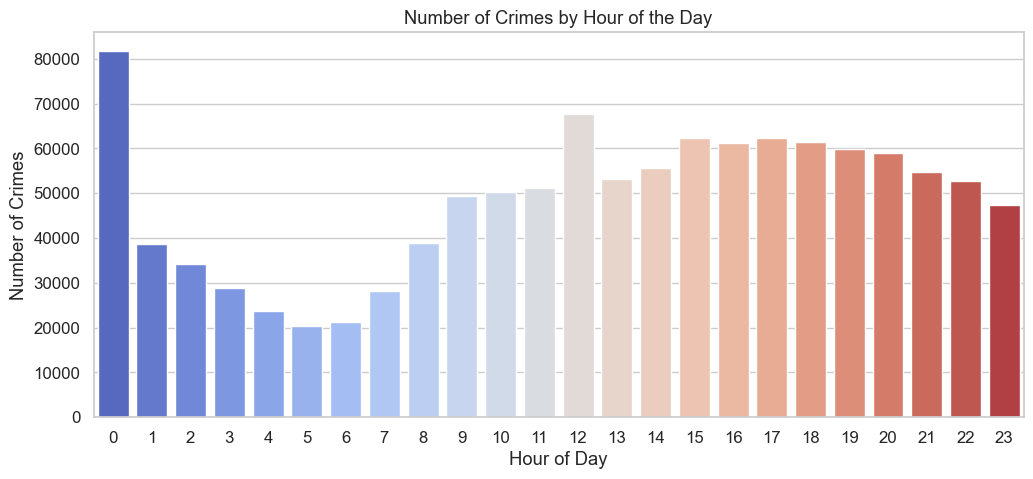

In [83]:
plt.figure(figsize=(12,5))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title('Number of Crimes by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()
# Most crimes occur between 6 PM and 11 PM → evening hours are the most dangerous
# Low crime rate during early morning hours (1 AM – 6 AM) → opportunity to reduce patrols or focus on specific areas
# Knowing crime peaks by hour helps police plan daily patrols more precisely
# This data can be used to guide prevention programs and improve public lighting in high-risk areas during peak hours



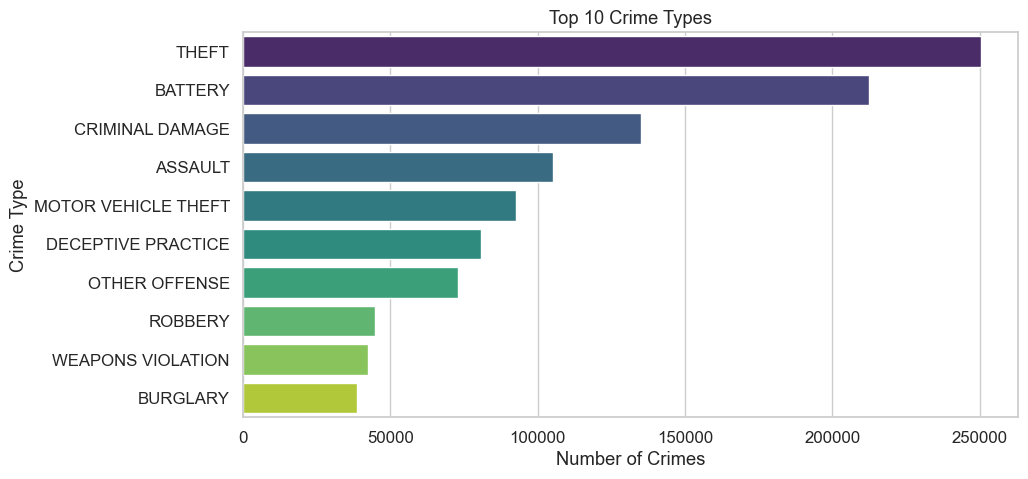

In [84]:
top_crimes = df['primary_type'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()
# The top 10 crime types account for the majority of incidents
# Some crimes like DECEPTIVE PRACTICE and ASSAULT occur most frequently
# Identifying the most common crimes helps in planning preventive strategies



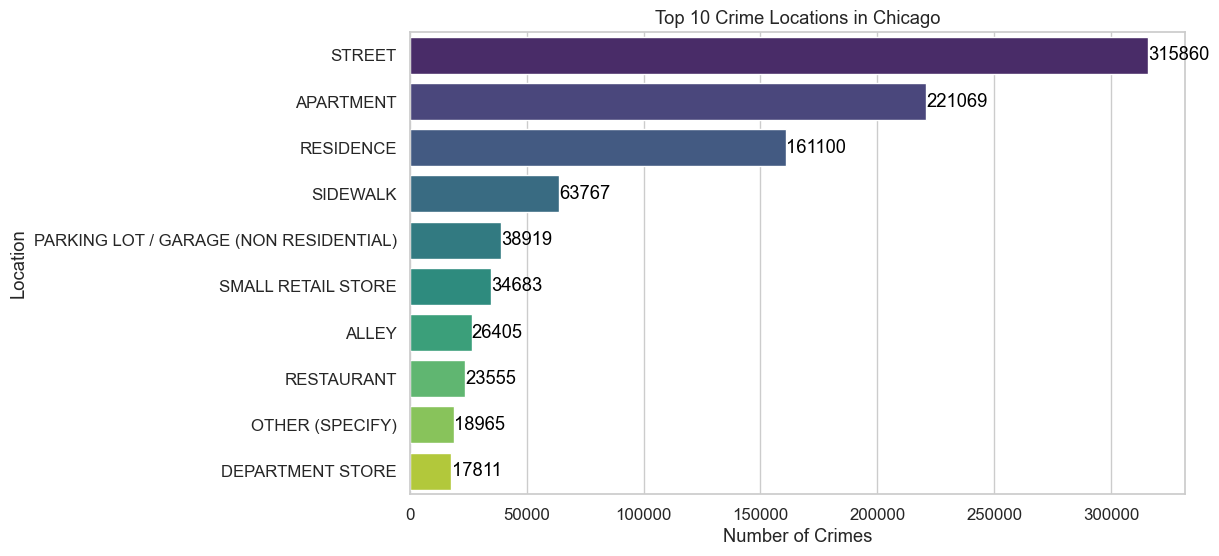

In [85]:
location_counts = df['location_description'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')

for i, v in enumerate(location_counts.values):
    plt.text(v + 50, i, f"{v}", color='black', va='center')

plt.title('Top 10 Crime Locations in Chicago')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
plt.show() 
# The top 10 crime locations are concentrated in streets and residential areas
# Some locations like RESIDENCE and STREET have the highest number of incidents
# Identifying crime locations helps improve security and monitoring plans


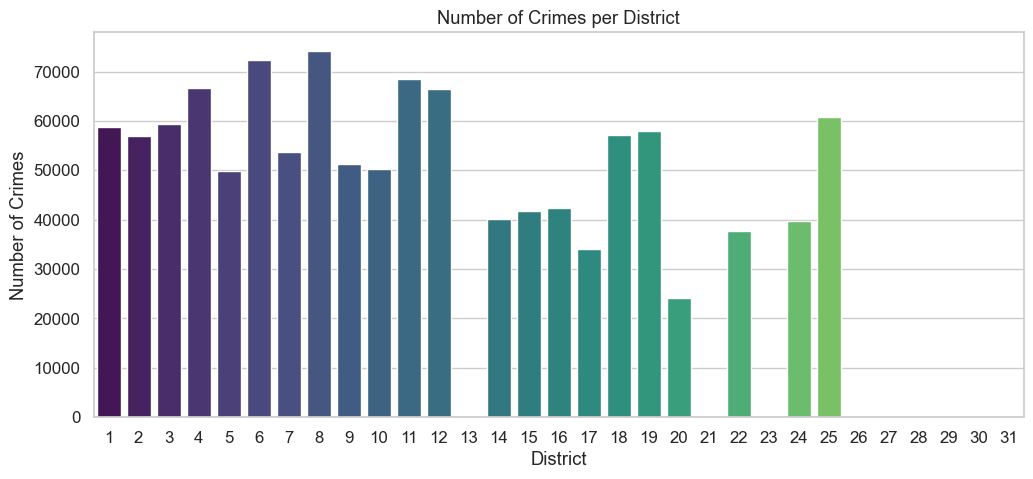

In [86]:
district_counts = df['district'].value_counts().sort_index()
all_districts = pd.Series(0, index=range(1,32)) 
district_counts = all_districts.add(district_counts, fill_value=0)

plt.figure(figsize=(12,5))
sns.barplot(x=district_counts.index, y=district_counts.values, palette='viridis')
plt.title('Number of Crimes per District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.show()
# Some districts like 6 and 8 have the highest number of crimes
# Some districts have very few crimes
# Understanding crime distribution by district helps in planning security resources


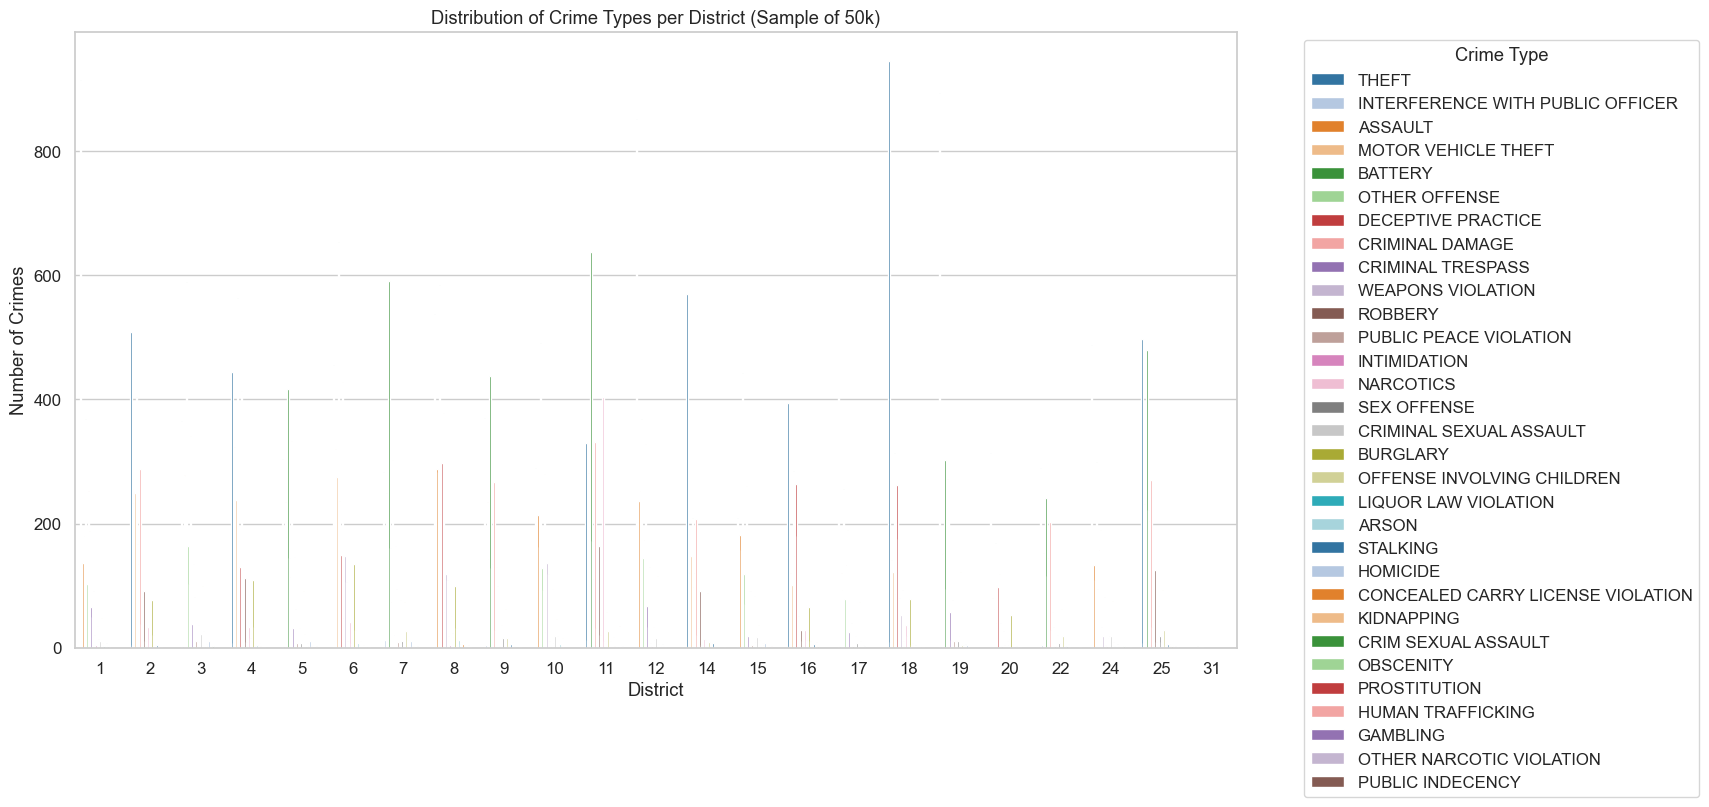

In [87]:
sample_df = df.sample(50000, random_state=42)
plt.figure(figsize=(15,8))
sns.countplot(x='district', hue='primary_type', data=sample_df,
              order=sorted(df['district'].unique()), palette='tab20')
plt.title('Distribution of Crime Types per District (Sample of 50k)')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# Some districts like 2 and 10 show high density in fraud and assault crimes, indicating a need for increased police patrols
# Certain districts are dominated by specific crimes like offenses involving children, suggesting the need for community intervention or protection programs
# Comparing crime type distribution across districts helps in allocating resources more effectively for each crime type
# Understanding the variety or concentration of crimes per district allows police to design more effective monitoring and response plans
# This chart reveals geographic patterns of crimes by type, useful for implementing targeted preventive strategies


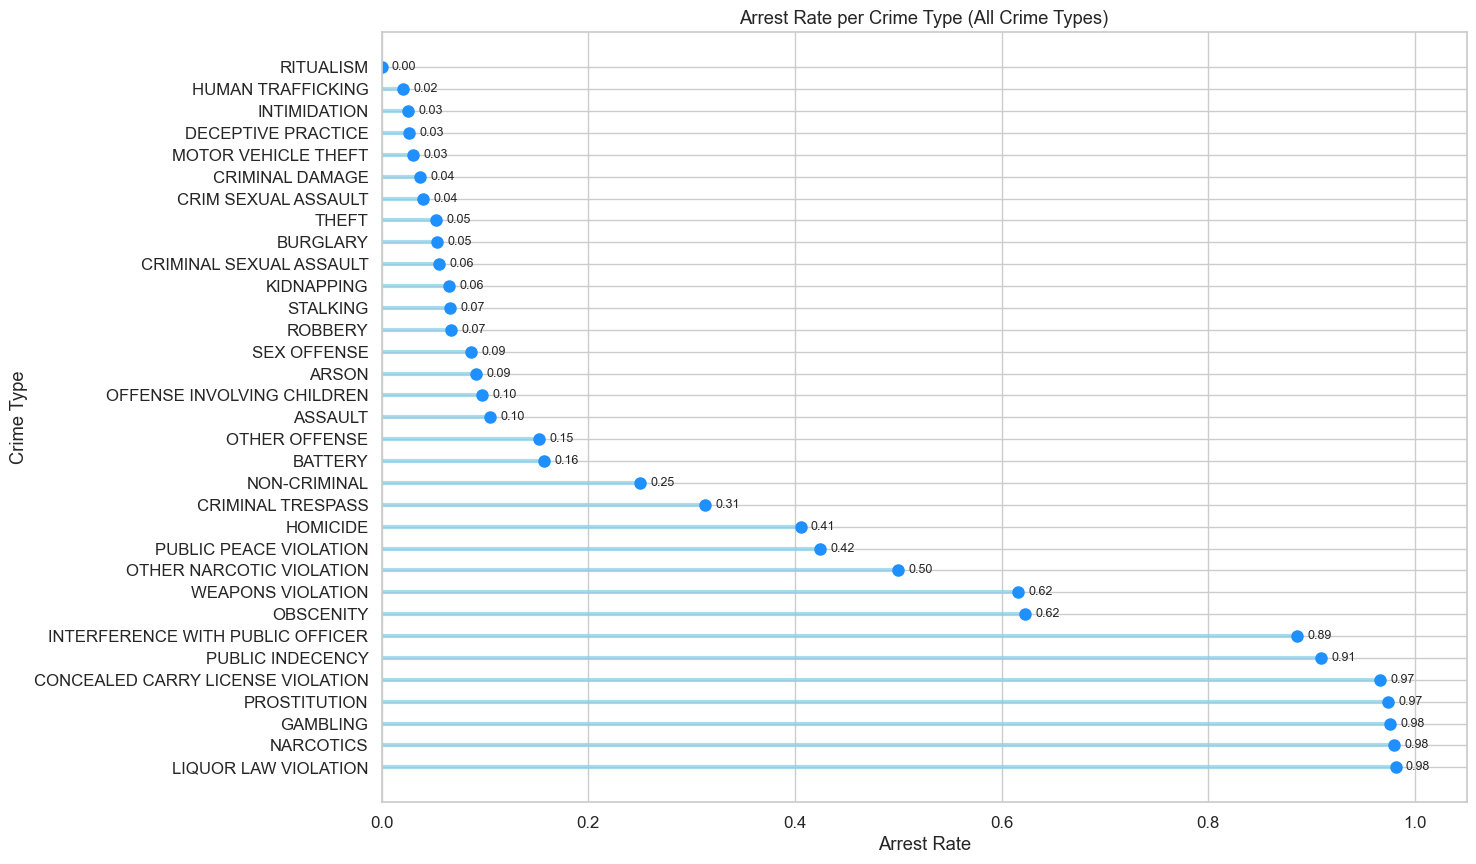

In [88]:
arrest_rate = df.groupby('primary_type')['arrest'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,10))
plt.hlines(y=arrest_rate.index, xmin=0, xmax=arrest_rate.values, color='skyblue', alpha=0.7, linewidth=3)
plt.plot(arrest_rate.values, arrest_rate.index, "o", markersize=8, color='dodgerblue')

for x, y in zip(arrest_rate.values, arrest_rate.index):
    plt.text(x + 0.01, y, f'{x:.2f}', va='center', fontsize=9)

plt.title('Arrest Rate per Crime Type (All Crime Types)')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')
plt.xlim(0,1.05) 
plt.show()
# Some crime types have the highest arrest rates, reflecting strong police response
# Some crimes have relatively low arrest rates, indicating difficulty in apprehending offenders
# Understanding arrest rate per crime type helps improve investigation strategies and resource allocation
# Focusing on low-arrest crimes can help design programs to reduce impunity
# This chart highlights which crimes require faster and more effective police intervention


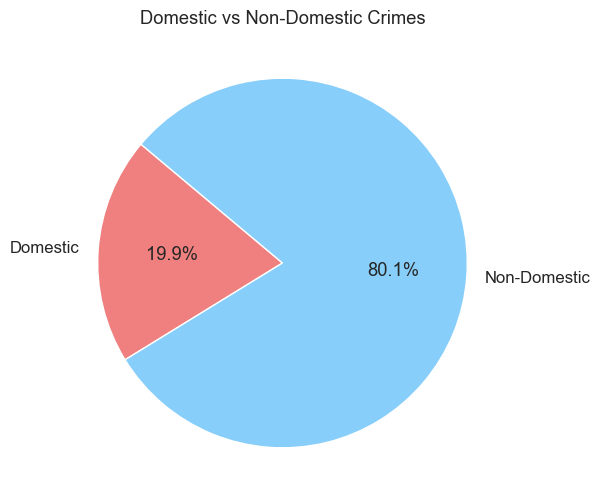

In [89]:
labels = ['Domestic', 'Non-Domestic']
sizes = [df['domestic'].sum(), (~df['domestic']).sum()]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral','lightskyblue'])
plt.title('Domestic vs Non-Domestic Crimes')
plt.show()
# Domestic crimes represent a significant portion of total crimes, indicating a need to strengthen family protection programs
# This chart aids in directing security and social resources effectively between domestic and public crimes


<Figure size 1200x1000 with 0 Axes>

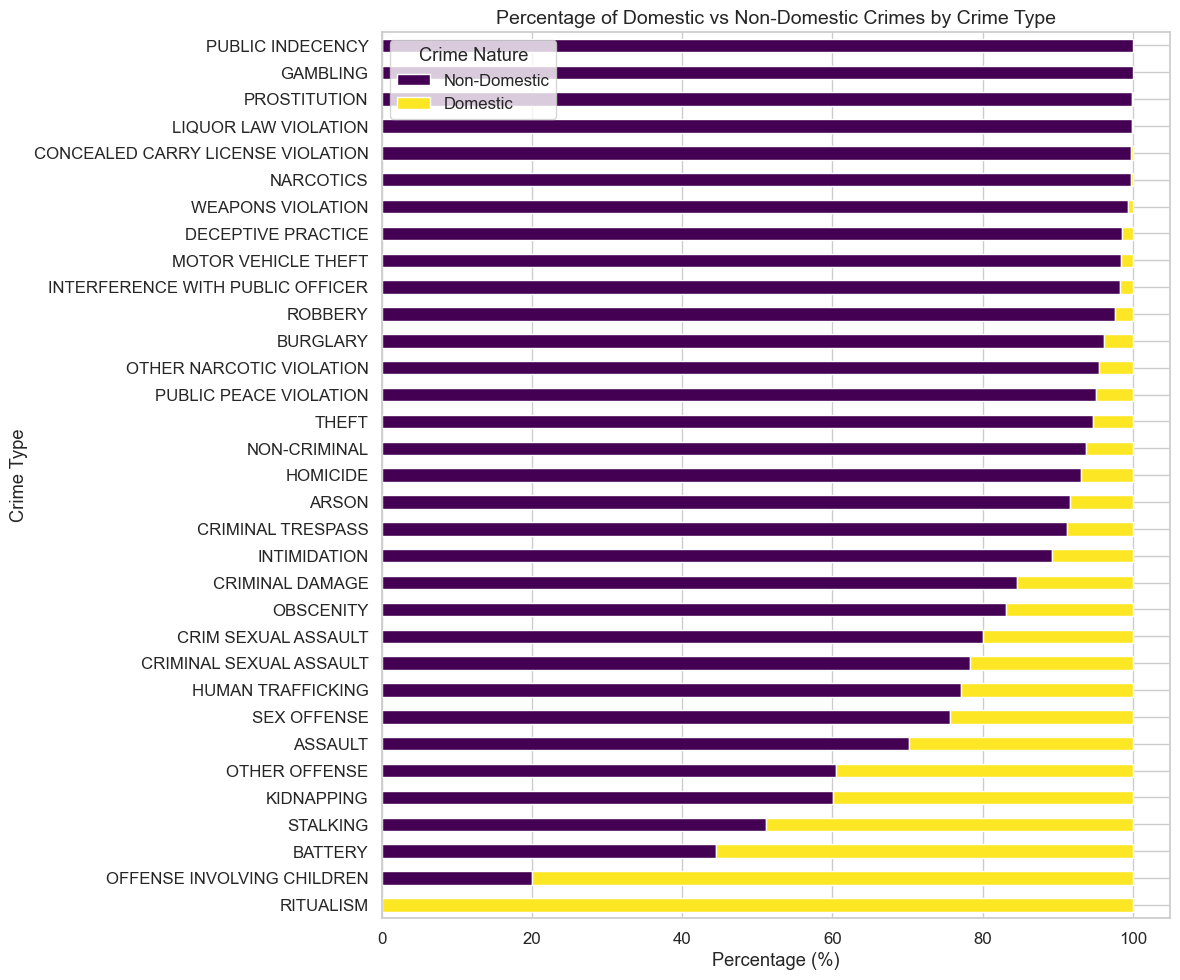

In [90]:
crime_domestic = df.groupby(['primary_type', 'domestic']).size().unstack(fill_value=0)

crime_percent = crime_domestic.div(crime_domestic.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 10))
crime_percent.sort_values(by=True, ascending=False).plot(
    kind='barh',
    stacked=True,
    figsize=(12,10),
    colormap='viridis'
)

plt.title('Percentage of Domestic vs Non-Domestic Crimes by Crime Type', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Crime Type')
plt.legend(['Non-Domestic', 'Domestic'], title='Crime Nature')
plt.tight_layout()
plt.show()
# Some crime types like OFFENSE INVOLVING CHILDREN and CRIMINAL RITUALISM are mostly domestic
# Crimes like DECEPTIVE PRACTICE and THEFT are mostly non-domestic, occurring in streets or public places
# Understanding the percentage of domestic crimes per crime type helps in designing targeted preventive programs
# This chart highlights which crime types require faster social or police intervention for domestic offenses


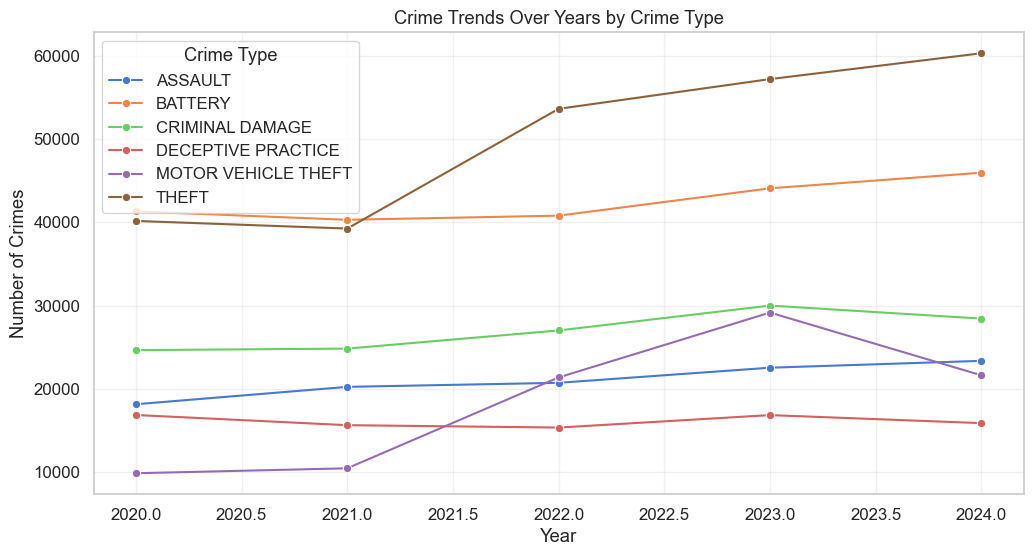

In [91]:
top_types = df['primary_type'].value_counts().head(6).index
df_top = df[df['primary_type'].isin(top_types)]

crime_year = df_top.groupby(['year','primary_type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=crime_year, x='year', y='count', hue='primary_type', marker='o')

plt.title('Crime Trends Over Years by Crime Type')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(alpha=0.3)
plt.legend(title='Crime Type')
plt.show()
# Some crimes show a clear increase in recent years
# Some crimes remain relatively stable over time
# Analyzing crime trends by type helps identify which crimes need urgent intervention or preventive programs
# This chart can assist in allocating security resources for each crime type based on temporal trends


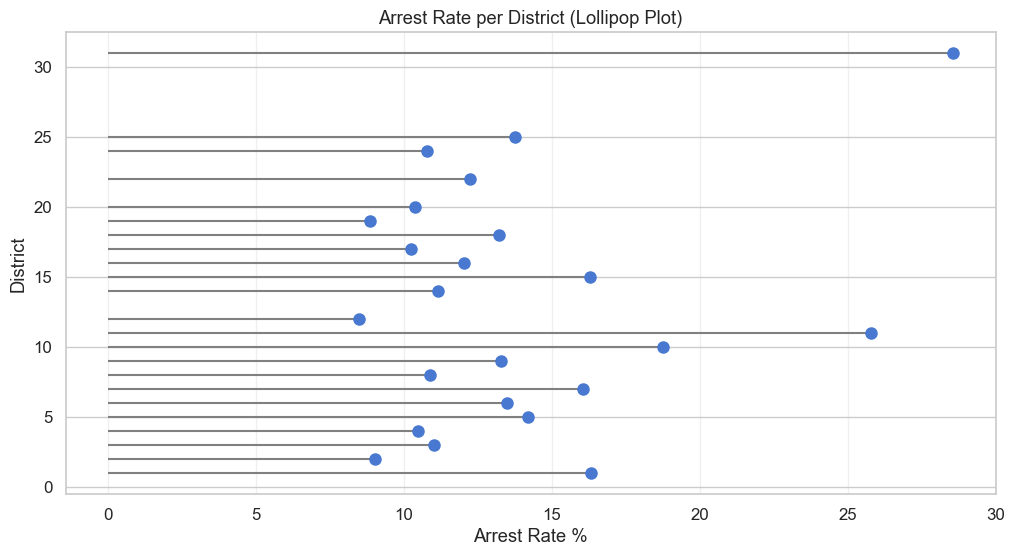

In [92]:
sorted_districts = district_stats.sort_values('arrest_rate')

plt.figure(figsize=(12,6))

plt.hlines(y=sorted_districts['district'],
           xmin=0,
           xmax=sorted_districts['arrest_rate'],
           color='gray')

plt.plot(sorted_districts['arrest_rate'],
         sorted_districts['district'],
         'o', markersize=8)

plt.title('Arrest Rate per District (Lollipop Plot)')
plt.xlabel('Arrest Rate %')
plt.ylabel('District')
plt.grid(axis='x', alpha=0.3)
plt.show()
# Some districts have high arrest rates, reflecting police effectiveness in those areas
# Some districts have low arrest rates compared to their crime count, indicating a need for improved investigations or resources
# Understanding arrest rate differences across districts helps in directing security interventions more effectively
# This chart highlights districts that require additional support to improve apprehension of offenders


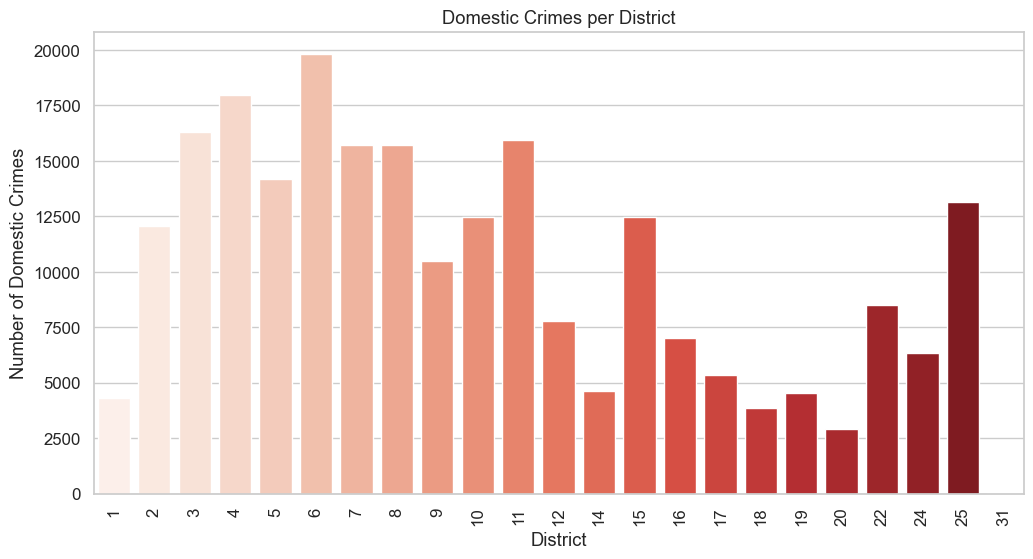

In [93]:
domestic_by_district = df.groupby('district')['domestic'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=domestic_by_district, x='district', y='domestic', palette='Reds')
plt.title('Domestic Crimes per District')
plt.ylabel('Number of Domestic Crimes')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.show()
# Some districts  have the highest number of domestic crimes
# Some districts have very few domestic crimes, indicating variation in their prevalence
# Understanding domestic crime distribution by district helps in directing family protection programs and police resources effectively
# This chart helps identify districts that require urgent social or security interventions to reduce domestic crimes



In [94]:
sample_df = df.sample(100000, random_state=42)

m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2, color='red', fill=True
    ).add_to(m)

m.save('chicago_crimes_map.html')
# Most crimes are concentrated in specific areas like downtown and main streets
# Some areas show low crime density, indicating safer neighborhoods
# Understanding the geographic distribution of crimes helps police identify hotspots and direct patrols
# This map can be used to plan targeted prevention and monitoring strategies in specific areas
